In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag
from plot_utils import plot_power_law_fit, plot_histogram

np.random.seed(33)

In [2]:
%matplotlib inline

In [3]:
N = 500
D = 2

In [4]:
angles = []
skewed_angles = []

for i in tqdm(range(1000)):
    DAG = dag.CausalSetGraph()
    R = dag.minkowski_interval(N, D)
    G = DAG.generate_graph(R, weighted=True)
    greedy_forward = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
    angles.extend(DAG.compute_path_property(greedy_forward, dag.paths.get_angles).values())
    skewed_angles.extend(DAG.compute_path_property(greedy_forward, dag.paths.get_skewed_angles_minkowski).values())

100%|██████████| 1000/1000 [02:52<00:00,  5.80it/s]


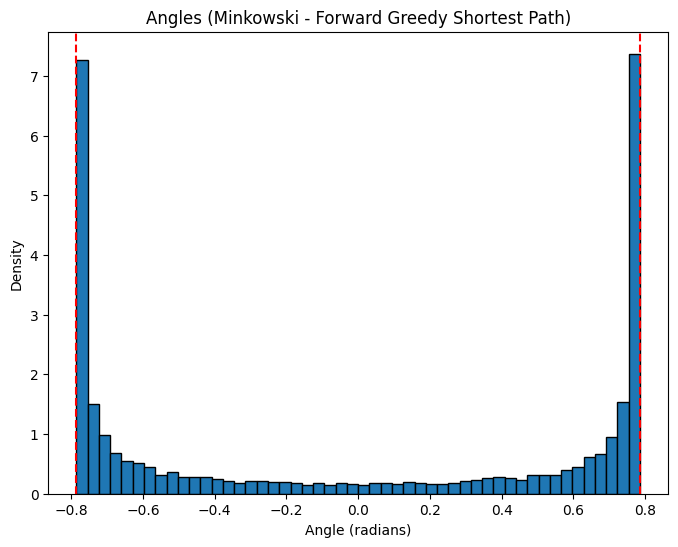

In [5]:
plot_histogram(angles, density=True, title="Angles (Minkowski - Forward Greedy Shortest Path)", x_label="Angle (radians)")

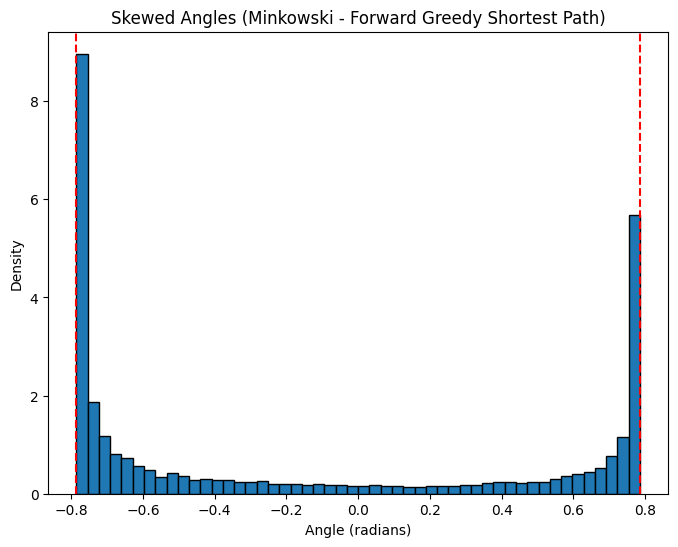

In [6]:
plot_histogram(skewed_angles, density=True, title="Skewed Angles (Minkowski - Forward Greedy Shortest Path)", x_label="Angle (radians)")

In [7]:
D = 2

n_range = np.logspace(1, 3.1, 60).astype(int)
n_iter = 100
angles_rms = []
errors = []

for n in tqdm(n_range):
    rms_deviations = []
    for _ in range(n_iter):
        DAG = dag.CausalSetGraph()
        R = dag.minkowski_interval(n, D)
        G = DAG.generate_graph(R, weighted=True)
        greedy_forward = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
        _, rms_deviation = DAG.compute_path_property(greedy_forward, dag.paths.get_angles_rms_deviation_minkowski)
        rms_deviations.append(rms_deviation)
    angles_rms.append(np.mean(rms_deviations))
    errors.append(np.std(rms_deviations)/np.sqrt(n_iter))

100%|██████████| 60/60 [10:36<00:00, 10.61s/it]


Fitted power: -0.0638 +- 0.0040


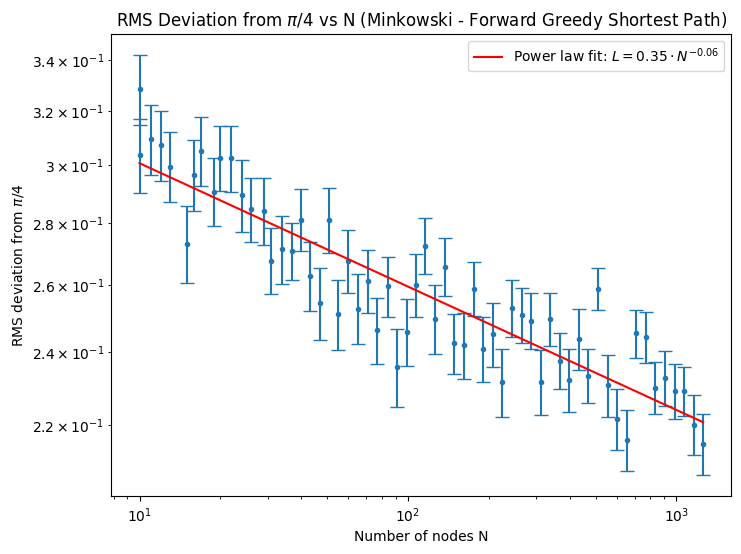

: 

In [9]:
plot_power_law_fit(n_range, angles_rms, errors=errors,
    title='RMS Deviation from $\pi$/4 vs N (Minkowski - Forward Greedy Shortest Path)',
    x_label="Number of nodes N",
    y_label="RMS deviation from $\pi$/4")

In [ ]:
N = 1700
D = 2

n_range = np.arange(10, N, 20)
avg_distances_to_geodesic = []

for n in tqdm(n_range):
    distances = []
    for _ in range(10):
        DAG = dag.CausalSetGraph()
        R = dag.minkowski_interval(n, D)
        G = DAG.generate_graph(R, weighted=True)
        greedy_forward = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
        avg_distance_to_geodesic = np.mean(list(DAG.compute_path_property(greedy_forward, dag.paths.get_distance_to_geodesic_minkowski).values()))
        distances.append(avg_distance_to_geodesic)
    avg_distances_to_geodesic.append(np.mean(distances))

In [ ]:
n_range = n_range.astype('float64')
plt.scatter(n_range, avg_distances_to_geodesic, marker='.')
plt.title('Average distance to geodesic (forward greedy shortest path)')
plt.xlabel('Number of nodes N')
plt.ylabel('Average distance to geodesic')
plt.grid(True)
plt.show()